Main project requirements:
  * few plots per question 2 per question 6-8 plots in total
  * heading for each q and summary of findings under q
  * at least 1 linear regression on at least Q4.
  


In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'Data/database.csv'
df = pd.read_csv(file_path, low_memory=False)  #low memory imput to avoid warning message
# df.info()
# column notes:
# Species Quantity values: '1', '2-10', nan, '11-100', 'Over 100' 

In [3]:
subset_df = df[["Incident Year","Incident Month","Airport","Airport ID", "State","Aircraft","Aircraft Type", "Flight Phase", "Species Name","Species ID","Species Quantity"]]
subset_df.to_csv("Data/data_subset.csv")


In [4]:
# # Jag's ^^^




# # todo add labels, pretty up.  add thoughts on results
# stateCounts = subset_df["State"].value_counts()
# stateCounts

# y_axis = stateCounts[:5]  
# x_axis = stateCounts.index[:5]

# plt.figure(figsize=(10,5))
# plt.bar(x_axis, y_axis, color = "pink")
# plt.tight_layout()  
# plt.xlabel('State Name')
# plt.ylabel("Number of Bird Strikes")
 

# for i in range(len(y_axis)):
#     plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')


# plt.show()


# Are bird strikes increasing or decreasing over time?

In [5]:
# Frequency of strikes by year
all_strikes = ["Radome Strike","Windshield Strike","Nose Strike","Engine1 Strike", "Engine2 Strike",
                "Engine3 Strike","Engine4 Strike", "Propeller Strike", "Wing or Rotor Strike",
                "Fuselage Strike","Landing Gear Strike", "Tail Strike", "Lights Strike", "Other Strike"]
all_strikes = df[["Incident Year","Airport"]].loc[subset_df["Incident Year"]!= 2015]
data_table = all_strikes.groupby("Incident Year").count()
# data_table

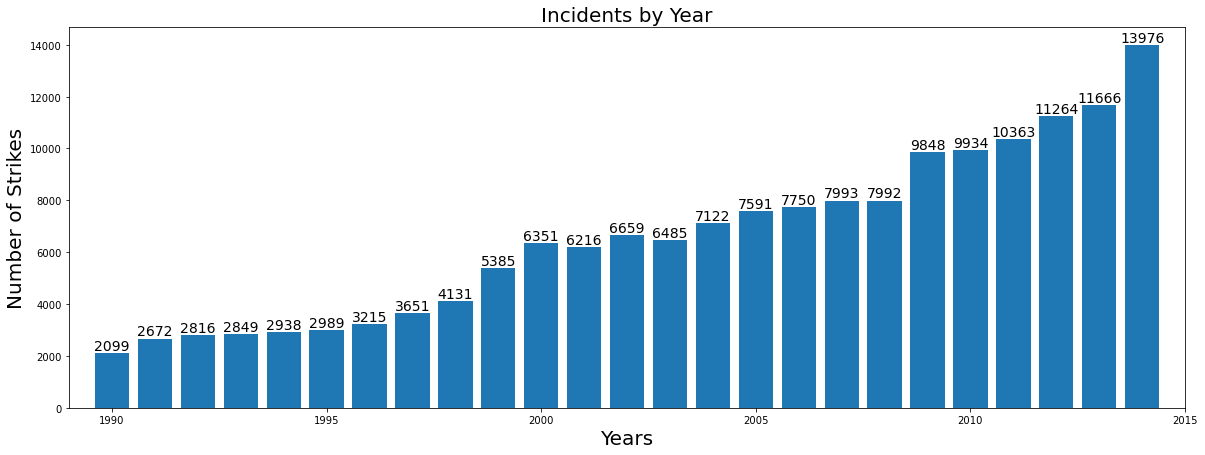

In [61]:
# Incidents/strikes by year
x_axis = data_table.index
y_axis = data_table["Airport"]
plt.figure(figsize=(20,7))
plt.bar(x_axis, y_axis)
plt.title("Incidents by Year", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Number of Strikes", fontsize=20)
plt.plot(color="#20F216", fontsize=20)
plt.xlim(1989, 2015)
y_list = list(y_axis)

for i in range(len(y_list)):
    plt.annotate(str(y_list[i]), xy=(x_axis[i],y_list[i]), ha='center', va='bottom', fontsize=14)
    
plt.savefig("Images/Incidentsbyyear.png", dpi=100) # TODO The legend and axis names are put in the saved image.

plt.show()

The graph shows the evolution of the strikes over the years. Apparently, the incidents keep on increasing every year. Maybe, the number of strikes is increasing because of the number of flight operations. Or, maybe the increase of strikes is related to an improvement of incidents reporting - the FAA (Federal Aviation Administration) is capturing the data better than before.

In [7]:
# Alyssa  \/\/\/ Which phase of the flight reports the most bird strikes?



In [8]:
#create animal kingdom column in dataframe and populate it for birds/mammals/reptiles involved in airplane incidents.
subset_wkingdom_df = subset_df
#most things in the list are birds, set everything to bird intially
subset_wkingdom_df["Animal_Kingdom"]= "BIRD"
#mammals have species id that starts w/1
subset_wkingdom_df["Animal_Kingdom"]= np.where(subset_wkingdom_df['Species ID'].str.startswith('1',na=False), "MAMMAL",subset_wkingdom_df["Animal_Kingdom"])
#repiles start with 2
subset_wkingdom_df["Animal_Kingdom"]= np.where(subset_wkingdom_df['Species ID'].str.startswith('2',na=False), "REPTILE",subset_wkingdom_df["Animal_Kingdom"])
subset_wkingdom_df.to_csv("Data/data_subset_wKingdom.csv")


In [33]:
#checkout breakdown as %s
subset_wkingdom_df["Animal_Kingdom"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#df.shape
df[['Height', 'Injuries', 'Fatalities']].describe()

,Height,Injuries,Fatalities
count,103677.000000,229.000000,565.000000
mean,831.032283,1.746725,0.046018
std,1803.650833,6.571239,0.435164
min,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,50.000000,1.000000,0.000000
75%,800.000000,1.000000,0.000000
max,31300.000000,100.000000,8.000000


Std Deviation Height is 1803.65; Max height is 31,300 ft and min height is 0 ft
Max injuries is 100
Max fatalities is 8

Animal kingdom breakdown:
BIRD 96.9% MAMMAL 3.0% REPTILE 0.1%

## Which phase of the flight reports the most animal strikes?

In [10]:
subset_df["Flight Phase"].value_counts()
flightphase= subset_df.groupby(['Flight Phase'])
flightphase = flightphase['Incident Year'].count().reset_index().rename(columns={"Incident Year":"Count"})
flightphase = flightphase.sort_values(by='Count',ascending=False).reset_index(drop = True)
#print(flightphase.Count.sum())  check count of sum == the total of non-NaN rows for flight phase 118802
print("Total rows that contain Flight Phase data: "+str(df["Flight Phase"].notnull().sum()))  #118802 rows have flight phase data
#len(df[df["Flight Phase"].isna()])+df["Flight Phase"].notnull().sum() #55302 rows have no flight phase + 118802 = 174104 total rows from orig dataset

#the bottom 6 parts of flight make up only ~1% of the total, so pulled those together to new category "Other"
others_label=flightphase["Flight Phase"][6:]
others_total=flightphase.Count[6:].sum()
new_row = {'Flight Phase':'OTHER', 'Count':others_total}
#append row to the dataframe
flightphase = flightphase.append(new_row, ignore_index=True)
#reorder to move "other" row up to index 6
flightphase = flightphase.sort_values(by='Count',ascending=False).reset_index(drop = True)


Total rows that contain Flight Phase data: 118802


In [11]:
#figure out how to make others label into simple text list  TODO
#print(list(others_label))
olist=list(others_label)
#for label in others_label:
#    print(label)
#join makes things a string, between every item, tell it what to put inbetween before the join
print(f"Other category includes the following: {', '.join(olist)}")

Other category includes the following: LANDING, TAXI, DEPARTURE, LOCAL, ARRIVAL, PARKED


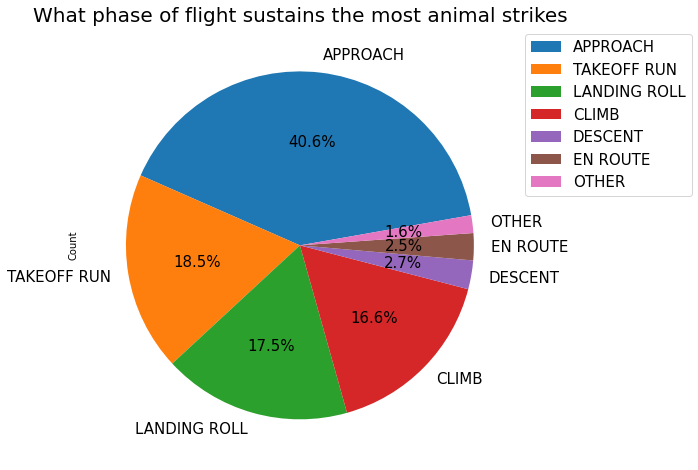

In [50]:
#plot data
pieLabels = flightphase["Flight Phase"][0:7]
#todo get the "count" out of there.
pies = flightphase[0:7].plot.pie(y="Count",figsize=[10, 8],labels=pieLabels,autopct='%1.1f%%',startangle=10, fontsize=15)
pies.set_aspect('equal')
pies.legend(loc='center left', bbox_to_anchor=(1, .8), fontsize=15) #move legend off the pie
plt.title("What phase of flight sustains the most animal strikes", fontsize=20)
plt.savefig("Images/Flightphase.png", dpi=100) # TODO The legend and axis names are put in the saved image.

#todo maybe compare this against injuries/fatalities?

Total rows that contain Flight Phase data: 118802 There are 13 unique phases of flight, the bottom 6 make up only ~1% of the total, so pulled those together to new category "Other". Other includes the following flight phases: LANDING, TAXI, DEPARTURE, LOCAL, ARRIVAL, PARKED.

Approach makes up the majority of animal encounters at 40%.

Vocabulary: Approach – The phase of flight when the pilot intends to land on the runway. There are different types of approaches, depending on whether the pilot is flying VFR or IFR.

Climb – The act of increasing aircraft altitude, typically to a designated level.

Descent – The act of decreasing aircraft altitude, typically to a designated level.

en Route – In air traveling to a destination.

landing roll- the movement of an aircraft from touchdown through deceleration to taxi speed or full stop.

takeoff run - The distance traveled by an airplane from the commencement of takeoff to the point when it leaves the ground or water. https://epicflightacademy.com/aviation-terminology/

## What phase of flight has the most injuries and fatalities

In [15]:
#todo make another chart to show phase of flight vs. injury/fatality
#drop the rows that don't have injury or fatality

injuryFatality_df = df[['Flight Phase','Injuries', 'Fatalities','Record ID']]  #narrow the column list
injuryFatality_df = injuryFatality_df[injuryFatality_df['Flight Phase'].notna()]  #drop rows w/NaN flight phase 118802 remaining
#drop rows where both injury and fatality are NaN.(ie keep rows that have either a nonna injury or non-na fatality)
injuryFatality_df = injuryFatality_df[(injuryFatality_df['Injuries'].notna()) | (injuryFatality_df['Fatalities'].notna()) ]
#another way to do the same thing below:
#injuryFatality_df =injuryFatality_df.dropna(axis =0, subset=['Injuries', 'Fatalities'], how='all') #drop if both injuries and fatalities are nan
print(injuryFatality_df.shape) #787 rows the subset way
injuryFatality_df=injuryFatality_df.fillna(0) #fill remaining nas w/0s

#keep only rows that have fatality or injury > 0
injuryFatality_df = injuryFatality_df[(injuryFatality_df['Injuries'] > 0) | (injuryFatality_df['Fatalities'] > 0) ]
print(injuryFatality_df.shape)  #down to 237 rows

#injuryFatality_df[['Flight Phase','Injuries', 'Fatalities']].sort_values(by="Fatalities", ascending=False)
inj_fat_gb=injuryFatality_df.groupby(['Flight Phase','Injuries', 'Fatalities']).count().rename(columns={"Record ID":"Count"})
# inj_fat_gb#.plot(kind="bar")  #todo  graph this some how
inj_fat_gb.reset_index(inplace=True)
inj_fat_gb["Total_inj"]=inj_fat_gb['Injuries']*inj_fat_gb['Count']
inj_fat_gb["Total_fat"]=inj_fat_gb['Fatalities']*inj_fat_gb['Count']
#inj_fat_gb

(787, 4)
(237, 4)


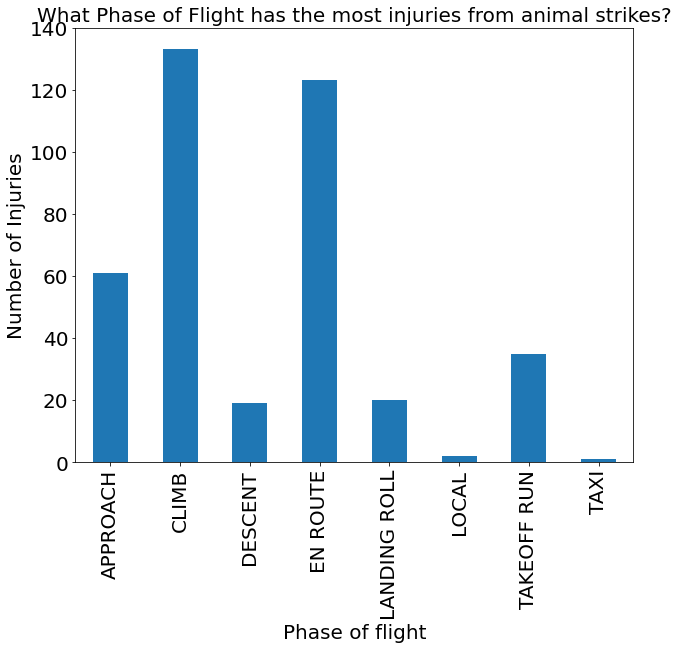

In [44]:
injury_tots=inj_fat_gb.groupby(['Flight Phase']).sum()
injury_tots["Total_inj"].plot(kind="bar",figsize=(10,8), fontsize=20)
plt.xlabel('Phase of flight', fontsize=20) # Label the x axis 
plt.ylabel("Number of Injuries", fontsize=20)  # Label the y axis
plt.title("What Phase of Flight has the most injuries from animal strikes?", fontsize=20)
plt.ylim(0,140)
plt.savefig("Images/Injuries.png", dpi=100) # TODO The legend and axis names are put in the saved image.

The Climb data is skewed due to a single event. 100 injured flying out of LGA, plane landed in the hudson.  Perhaps you've heard of this event, it became a Tom Hanks movie.  It's the single event in this data that had more than 7 injuries.

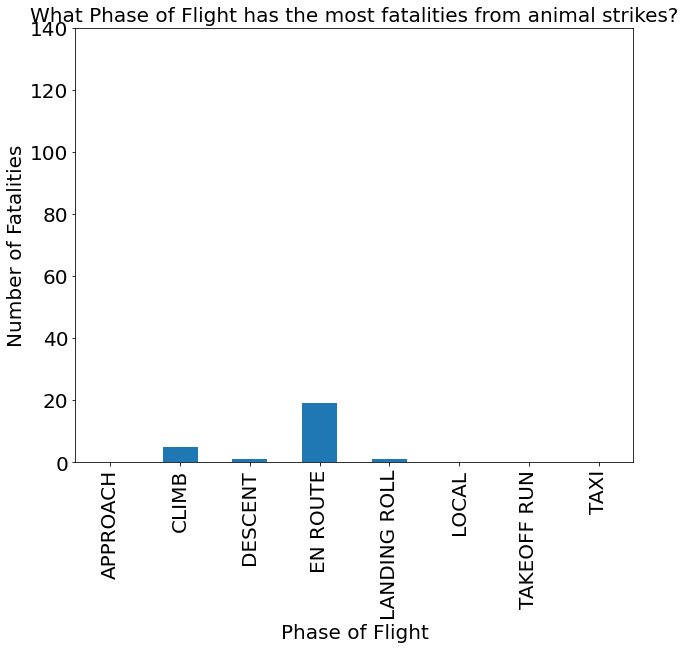

In [40]:
injury_tots=inj_fat_gb.groupby(['Flight Phase']).sum()
injury_tots["Total_fat"].plot(kind="bar",figsize=(10,8), fontsize=20)
plt.xlabel('Phase of Flight', fontsize=20) # Label the x axis 
plt.ylabel("Number of Fatalities", fontsize=20)  # Label the y axis
plt.title("What Phase of Flight has the most fatalities from animal strikes?", fontsize=20)
plt.ylim(0,140)
plt.savefig("Images/Fatalities.png", dpi=100) 

The original dataset has 174104 rows (incidents of animal strikes). For flight phase injury and fatality graphs, removed all rows that had NULL values for phase of flight and NULL for both injury and fatality data.  That brought dataset down to 237 rows.  Each incident/row had an injury or fatality number (generally range of 1-8).  Grouped the data by Flight Phase and summed the grouped count * injury/fatality number for each flight phase.

## Where on the aircraft most likely to get damages during a strike? 


In [18]:
damage_subset_df = df[["Airport ID","Species Quantity","Fatalities","Injuries","Aircraft Damage","Radome Strike","Radome Damage","Windshield Strike","Windshield Damage","Nose Strike","Nose Damage","Engine1 Strike","Engine1 Damage","Engine2 Strike","Engine2 Damage","Engine3 Strike","Engine3 Damage","Engine4 Strike","Engine4 Damage","Engine Ingested","Propeller Strike","Propeller Damage","Wing or Rotor Strike","Wing or Rotor Damage","Fuselage Strike","Fuselage Damage","Landing Gear Strike","Landing Gear Damage","Tail Strike","Tail Damage","Lights Strike","Lights Damage","Other Strike","Other Damage"]]


In [20]:
stk_dmg_totals =damage_subset_df[["Radome Strike","Radome Damage","Windshield Strike","Windshield Damage","Nose Strike","Nose Damage","Engine1 Strike","Engine1 Damage","Engine2 Strike","Engine2 Damage","Engine3 Strike","Engine3 Damage","Engine4 Strike","Engine4 Damage","Engine Ingested","Propeller Strike","Propeller Damage","Wing or Rotor Strike","Wing or Rotor Damage","Fuselage Strike","Fuselage Damage","Landing Gear Strike","Landing Gear Damage","Tail Strike","Tail Damage","Lights Strike","Lights Damage","Other Strike","Other Damage"]].sum()
stk_dmg_totals = stk_dmg_totals.to_frame()
stk_dmg_totals.rename(columns={0:"Count"}, inplace =True)  #rename column
#stk_dmg_totals

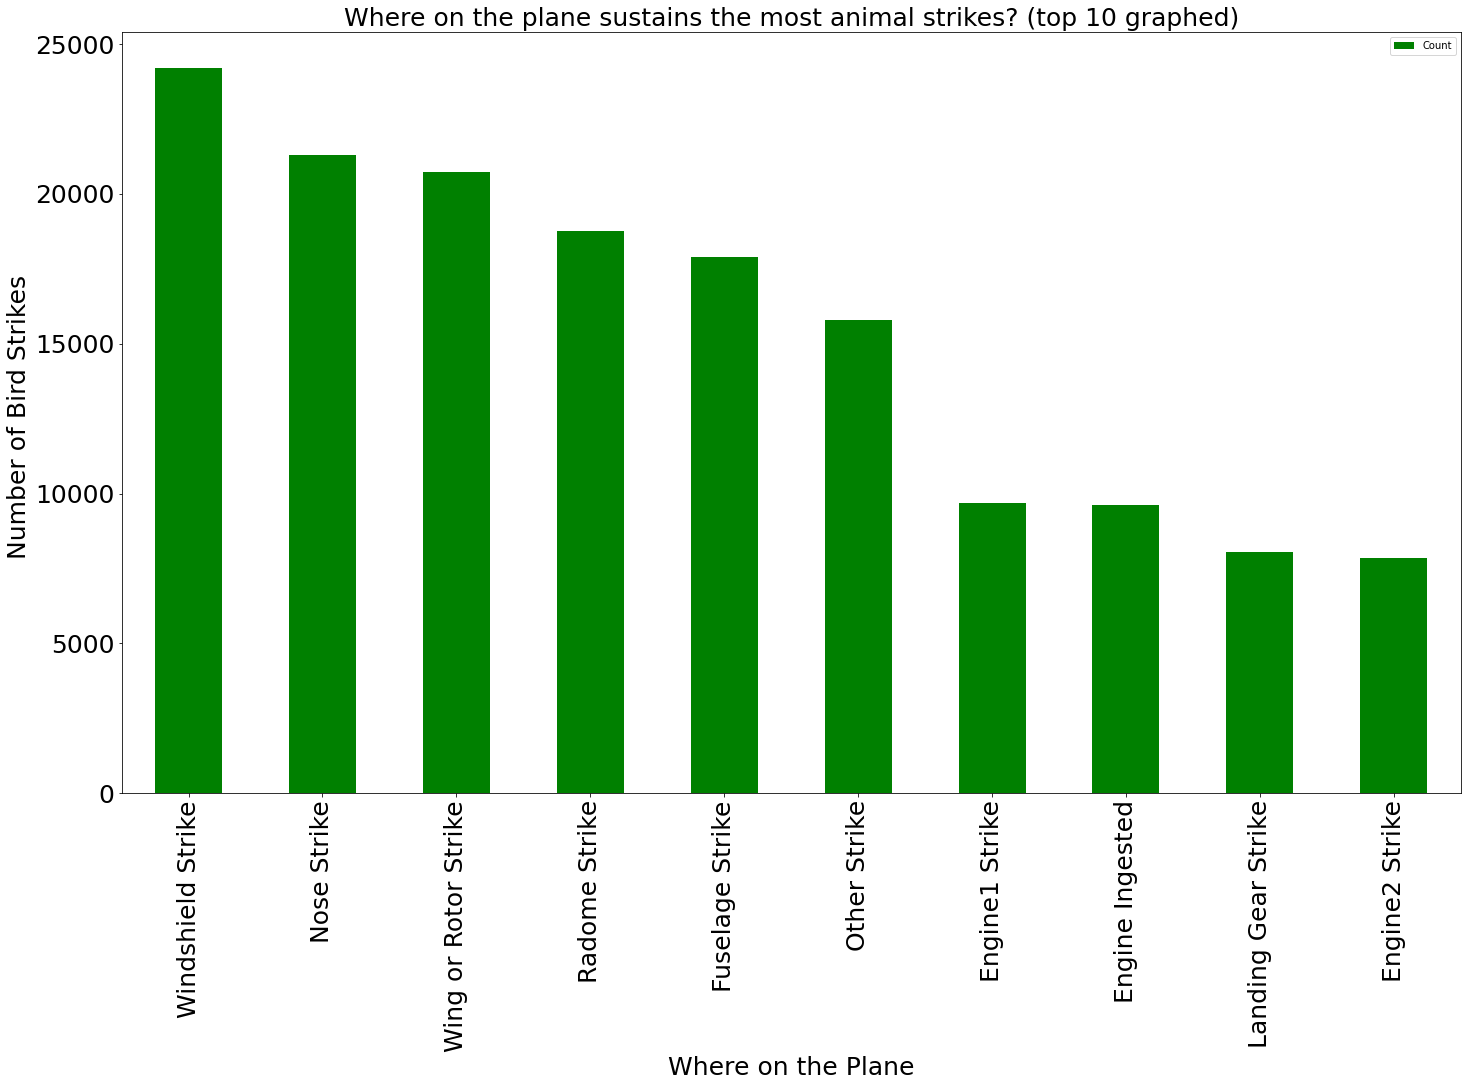

In [41]:
orderd_stk_dmg=stk_dmg_totals.sort_values("Count",ascending=False)
#graph the top 10 places to be struck TODO make pretty
# graph the top 10 places to receive damage  todo make pretty
# figure out % of strikes resulting in damage. graph this
#TODO figure out % of strikes resuling in injuries or fatalities

#plot the top 10 places on a the plan struck by animals
orderd_stk_dmg[0:10].plot(kind="bar", color="green",figsize=(24,14), fontsize=25)
plt.xlabel('Where on the Plane', fontsize=25) # Label the x axis 
plt.ylabel("Number of Bird Strikes ", fontsize=25)  # Label the y axis
plt.title("Where on the plane sustains the most animal strikes? (top 10 graphed)", fontsize=25)

plt.savefig("Images/AnimalStrikeWhere.png", dpi=100) # TODO The legend and axis names are put in the saved image.


Graph shows the Windshield is the most likely place for an animal strike.

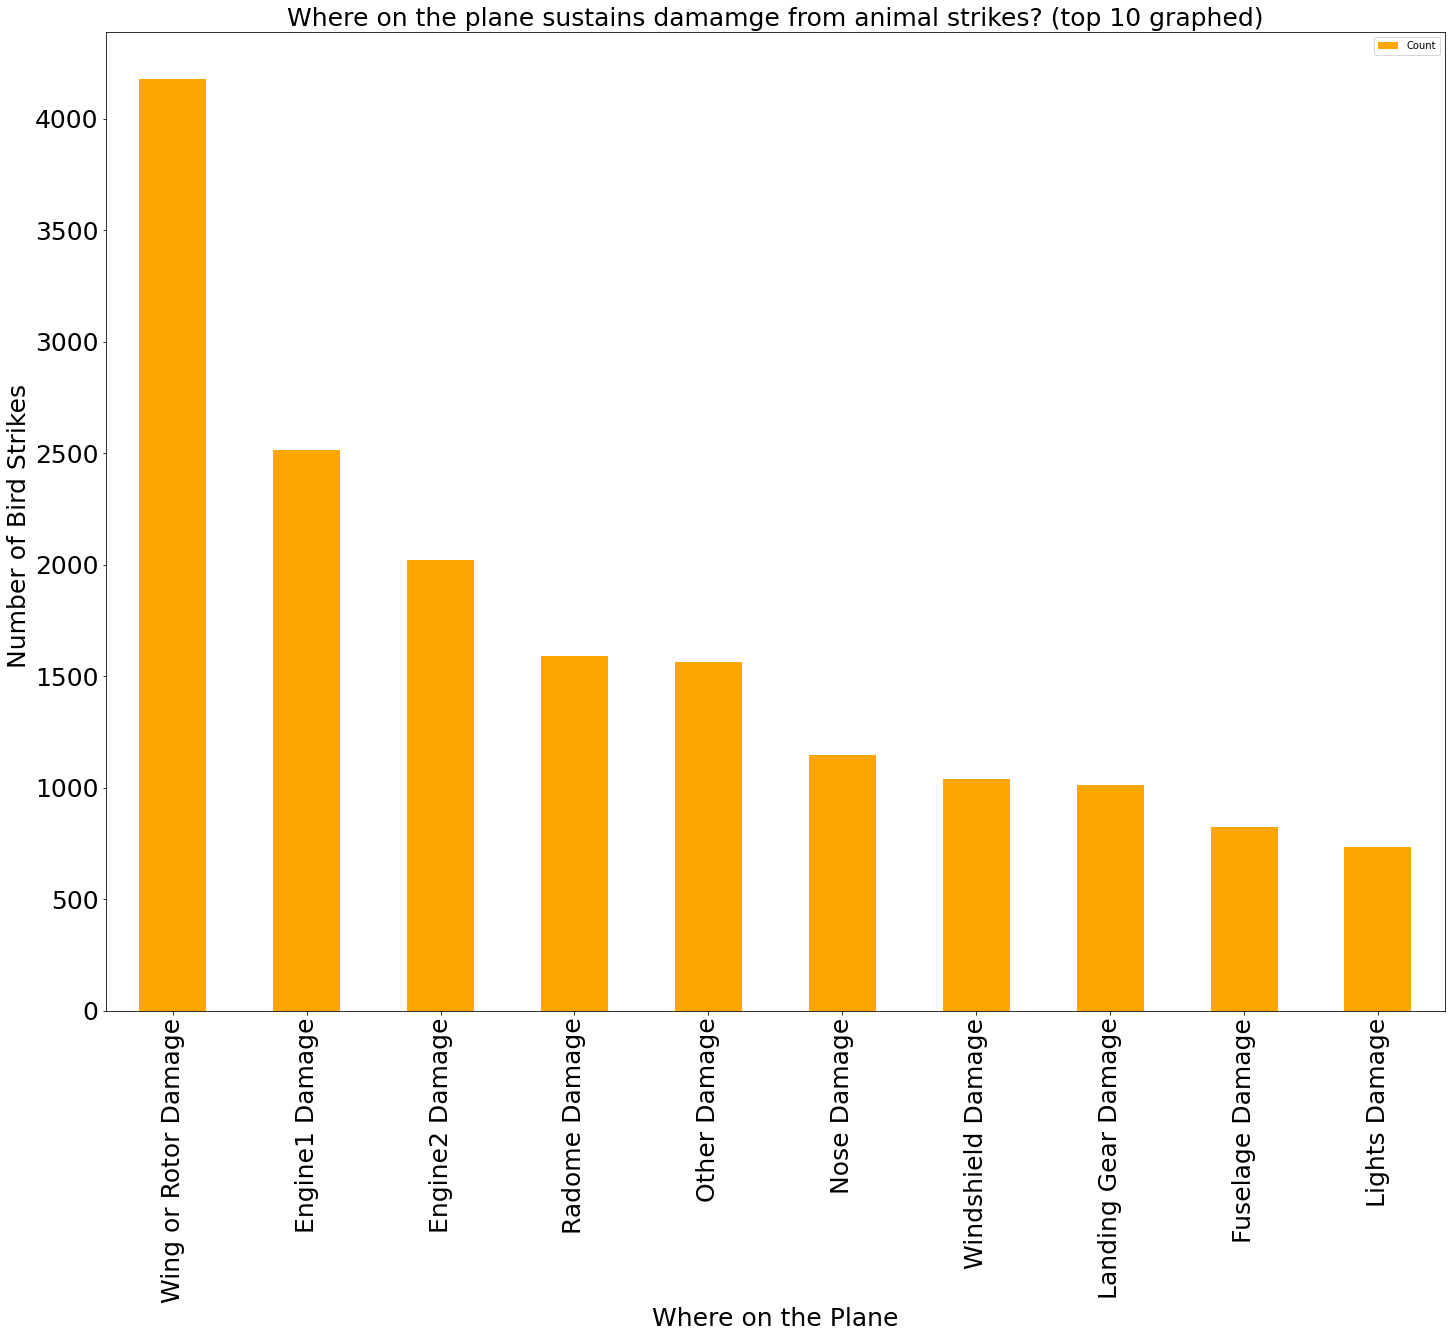

In [36]:
dmg_only = stk_dmg_totals.loc[stk_dmg_totals.index.str.contains('Damage')].sort_values("Count",ascending=False)

#plot the top 10 places that reported damage from the animal strike
dmg_only[0:10].plot(kind="bar", color="orange",figsize=(24,18), fontsize=25)
plt.xlabel('Where on the Plane', fontsize=25) # Label the x axis 
plt.ylabel("Number of Bird Strikes ", fontsize=25)  # Label the y axis
plt.title("Where on the plane sustains damamge from animal strikes? (top 10 graphed)", fontsize=25)
plt.savefig("Images/AnimalDamageWhere.png", dpi=100) # TODO The legend and axis names are put in the saved image.


Graph shows the wing/rotor are the most likely places to be damaged due to an animal strike.  Though the windsheild is most likely to be hit, it is only the 7th most likely place to be damaged by the strike.

In [23]:
damage_pct=orderd_stk_dmg  #made a copy, but it's just a new name for smae thing and "both" are getting updated

In [24]:
# calculate the % of strikes that caused damage for the top 10 parts of plane to be hit
damage_pct["StrikeDamage%"] = 0.00
damage_pct.at['Radome Strike','StrikeDamage%'] = damage_pct.at['Radome Damage','Count']/damage_pct.at['Radome Strike','Count']*100
damage_pct.at['Windshield Strike','StrikeDamage%'] = damage_pct.at['Windshield Damage','Count']/damage_pct.at['Windshield Strike','Count']*100
damage_pct.at['Nose Strike','StrikeDamage%'] = damage_pct.at['Nose Damage','Count']/damage_pct.at['Nose Strike','Count']*100
damage_pct.at['Wing or Rotor Strike','StrikeDamage%'] = damage_pct.at['Wing or Rotor Damage','Count']/damage_pct.at['Wing or Rotor Strike','Count']*100
damage_pct.at['Fuselage Strike','StrikeDamage%'] = damage_pct.at['Fuselage Damage','Count']/damage_pct.at['Fuselage Strike','Count']*100
damage_pct.at['Other Strike','StrikeDamage%'] = damage_pct.at['Other Damage','Count']/damage_pct.at['Other Strike','Count']*100
damage_pct.at['Engine1 Strike','StrikeDamage%'] = damage_pct.at['Engine1 Damage','Count']/damage_pct.at['Engine1 Strike','Count']*100
damage_pct.at['Landing Gear Strike','StrikeDamage%'] = damage_pct.at['Landing Gear Damage','Count']/damage_pct.at['Landing Gear Strike','Count']*100
damage_pct.at['Engine2 Strike','StrikeDamage%'] = damage_pct.at['Engine2 Damage','Count']/damage_pct.at['Engine2 Strike','Count']*100
damage_pct.at['Lights Strike','StrikeDamage%'] = damage_pct.at['Lights Damage','Count']/damage_pct.at['Lights Strike','Count']*100
damage_pct.sort_values("StrikeDamage%",ascending=False, inplace=True)  #order the df by % just calculated

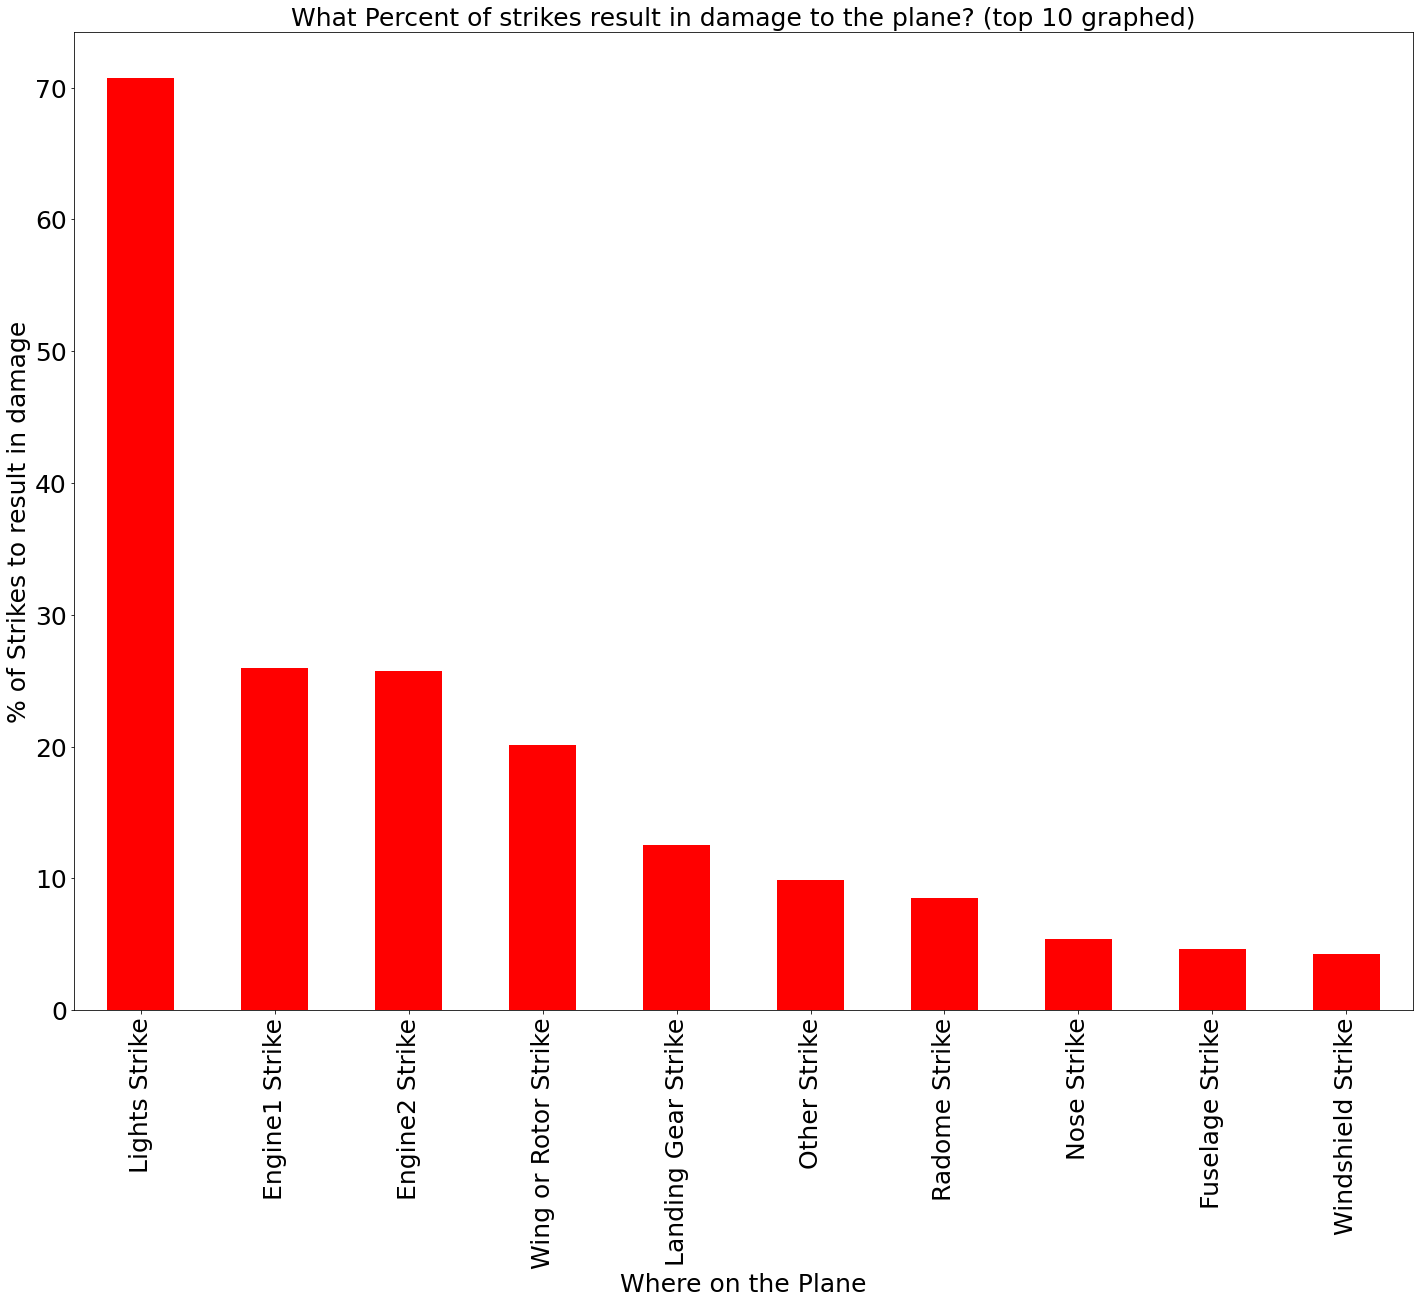

In [42]:
overallDamage_v_strikes = damage_subset_df["Aircraft Damage"].value_counts().to_frame()
pct = round(overallDamage_v_strikes.loc[1]/overallDamage_v_strikes.loc[0]*100,2)
#print(f"Overall {pct[0]}% Animal strikes resulted in damage to the aircraft." )
#plot percent of strikes that resulted in damage
damage_pct["StrikeDamage%"][0:10].plot(kind="bar",color="red", figsize=(24,18), fontsize=25)
#damage_pct_orderd#= damage_pct.sort_values("StrikeDamage%",ascending=False)
#damage_pct_orderd
plt.xlabel('Where on the Plane', fontsize=25) # Label the x axis 
plt.ylabel("% of Strikes to result in damage", fontsize=25)  # Label the y axis
plt.title("What Percent of strikes result in damage to the plane? (top 10 graphed)", fontsize=25)
plt.savefig("Images/AnimalDamageStikeHowmuch.png", dpi=100) # TODO The legend and axis names are put in the saved image.


Overall 9.41% Animal strikes resulted in damage to the aircraft.  
Differentiating by part of the plane, can see an animal strike causes damage 70% of the time when it hits the aircraft's lights, followed by Engine 1 and 2 with 25% each.